In [1]:
# ======================================================================
# Author: Tobias Meisel (meisto)
# Creation Date: Tue 11 Jan 2022 05:48:46 PM CET
# Description: -
# ======================================================================

In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

# Local file imports
import src.plot as P
import src.util.experiment as E
import src.util.datasets as D

In [3]:
# matplotlib settings
plt.rcParams["figure.figsize"] = (20,10)

# Seaborn style
sbn.set_theme(style="darkgrid")

In [4]:
exp_df = P.get_experiment_df()
exp_df

,root_path,name,latest_test_performance,latest_train_performance,done,current_timestep,initial_time
0,models/model_2022_01_11_15_34_37_v0/,1417679675524871611,0.905839,0.504196,False,300,2022_01_11_15_34_37
1,models/model_2022_01_11_15_34_39_v0/,3617812999392903543,0.940970,0.886081,False,250,2022_01_11_15_34_39
2,models/model_2022_01_11_15_34_40_v0/,-9119491438421719151,0.859329,0.832512,False,300,2022_01_11_15_34_40
3,models/model_2022_01_11_15_34_42_v0/,-1529211407692976424,0.835484,0.831237,False,400,2022_01_11_15_34_42
4,models/model_2022_01_11_15_34_43_v0/,2431797838164306863,0.586890,0.855650,False,400,2022_01_11_15_34_43
5,models/model_2022_01_11_15_34_45_v0/,8115752387131713877,0.895810,0.797118,False,400,2022_01_11_15_34_45
6,models/model_2022_01_11_15_34_48_v0/,-8976355337902950124,0.532007,0.872568,False,400,2022_01_11_15_34_48
7,models/model_2022_01_11_16_11_51_v0/,-289672317970570543,0.839640,0.863082,False,400,2022_01_11_16_11_51
8,models/model_2022_01_11_16_18_21_v0/,1476593052034814912,0.915513,0.889884,False,400,2022_01_11_16_18_21
9,models/model_2022_01_11_16_18_26_v0/,3466331223599922890,0.842711,0.679067,False,400,2022_01_11_16_18_26


In [5]:
exps = [E.load_experiment(e) for e in exp_df.root_path.unique()]
exps_dict = {e.root_path: e for e in exps}

In [6]:
# Load a dataframe containing the model performance and the associated experiment.
NAME_PREFIX = "81157"
selected_model = exp_df[exp_df["name"].str.startswith(NAME_PREFIX)]
assert selected_model.shape[0] == 1, "Too many selected models."

root_path = selected_model["root_path"].item()

print("Please select performance file:\n")
performance_df = P.get_performance_df(root_path=root_path)

experiment = exps_dict[root_path]

Please select performance file:

Found performance files:
[0] log_2022_01_11_15_34_45_s0.csv
[1] log_2022_01_11_15_36_23_s0.csv
[2] log_2022_01_11_16_29_33_s50.csv
[3] log_2022_01_11_17_33_23_s100.csv
[4] log_2022_01_11_18_32_45_s150.csv
[5] log_2022_01_11_19_40_55_s200.csv
[6] log_2022_01_11_20_45_11_s250.csv
[7] log_2022_01_11_21_56_23_s300.csv
[8] log_2022_01_11_22_55_50_s350.csv
[9] log_2022_01_11_23_56_36_s400.csv
Which experiment? 9


In [7]:
performance_df

,test_performances,train_performances,loss_over_time,total_rewards,mean_rewards
0,0.856017,0.653801,-1.606917e-02,44.640264,0.911026
1,0.854532,0.675785,-2.883250e-05,35.953065,0.733736
2,0.908466,0.902780,-1.332237e-02,55.369312,1.129986
3,0.858119,0.672079,-2.435943e-02,48.898404,0.997927
4,0.872510,0.776578,-3.406778e-02,34.149235,0.696923
...,...,...,...,...,...
396,0.898003,0.797330,-1.118984e-06,56.398208,1.150984
397,0.895810,0.619336,-9.535422e-08,54.152283,1.105149
398,0.890191,0.871881,-3.826852e-06,45.095679,0.920320
399,0.898963,0.678181,-2.562702e-06,18.827945,0.384244


In [8]:
performance_df[performance_df["test_performances"] == performance_df["test_performances"].max()].iloc[0]

test_performances      0.931320
train_performances     0.784870
loss_over_time         0.007908
total_rewards         57.168542
mean_rewards           1.166705
Name: 13, dtype: float64

In [9]:
print("Metrics in performance dataframe:")
for c in performance_df.columns: print("   ", c)
print()

print("Experiment parameters:")
for p in experiment.parameters: print(f"   {p:<28}:", experiment.parameters[p])

Metrics in performance dataframe:
    test_performances
    train_performances
    loss_over_time
    total_rewards
    mean_rewards

Experiment parameters:
   representation_dimension    : 64
   representation_generator    : quantile_sketch_array
   max_number_steps            : 7
   epsilon                     : 1.0
   gamma                       : 0.2338468582150265
   number_rollouts             : 7
   number_iterations           : 1000
   reward_function             : staggered_reward
   policy_type                 : <class 'src.representation.dataset_representation.MLPPolicy'>
   policy_parameters           : {'fe_arch': (64, 64, 32), 'prob_arch': (32, 16), 'num_transforms': 13}


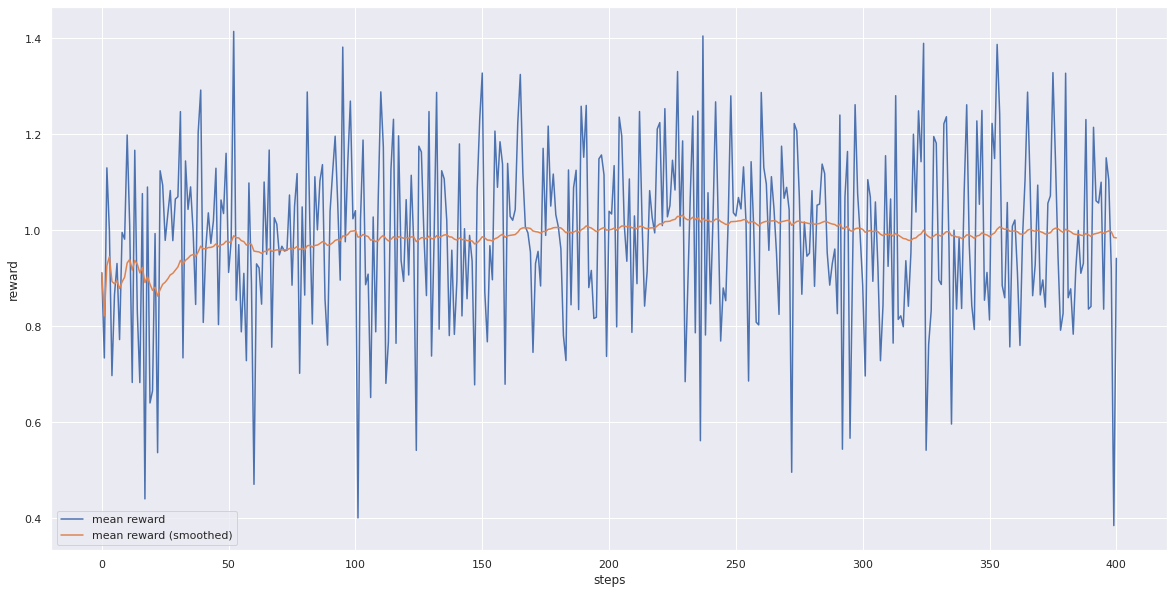

In [10]:
# Plot reward over time
sbn.lineplot(
    data=performance_df,
    x=performance_df.index,
    y="mean_rewards",
    label="mean reward"
)
sbn.lineplot(
    data=performance_df['mean_rewards'].ewm(span = 100).mean(),
    label="mean reward (smoothed)"
)

plt.ylabel("reward")
plt.xlabel("steps")
plt.show()

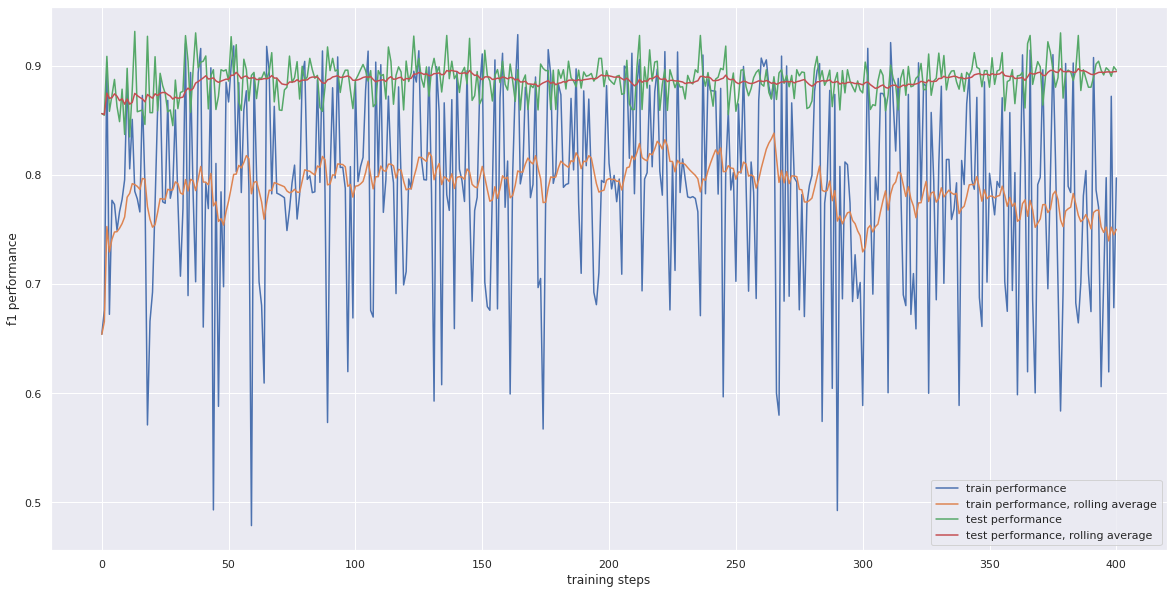

In [11]:
# Plot performances over time
sbn.lineplot(
    data=performance_df,
    x=performance_df.index,
    y="train_performances",
    label="train performance",
)
sbn.lineplot(
    data=performance_df["train_performances"].ewm(span=20).mean(),
    label="train performance, rolling average"
)

sbn.lineplot(
    data=performance_df,
    x=performance_df.index,
    y="test_performances",
    label="test performance"
)
sbn.lineplot(
    data=performance_df["test_performances"].ewm(span=20).mean(),
    label="test performance, rolling average"
)

plt.ylabel("f1 performance")
plt.xlabel("training steps")
plt.legend()
plt.show()

In [12]:
performance_df

,test_performances,train_performances,loss_over_time,total_rewards,mean_rewards
0,0.856017,0.653801,-1.606917e-02,44.640264,0.911026
1,0.854532,0.675785,-2.883250e-05,35.953065,0.733736
2,0.908466,0.902780,-1.332237e-02,55.369312,1.129986
3,0.858119,0.672079,-2.435943e-02,48.898404,0.997927
4,0.872510,0.776578,-3.406778e-02,34.149235,0.696923
...,...,...,...,...,...
396,0.898003,0.797330,-1.118984e-06,56.398208,1.150984
397,0.895810,0.619336,-9.535422e-08,54.152283,1.105149
398,0.890191,0.871881,-3.826852e-06,45.095679,0.920320
399,0.898963,0.678181,-2.562702e-06,18.827945,0.384244


In [13]:
print("Mean performance over first timesteps:")
print(performance_df.iloc[:10].mean())

print("\n")

print("Mean performance over last timesteps:")
performance_df.iloc[-10:].mean()

Mean performance over first timesteps:
test_performances      0.866342
train_performances     0.754188
loss_over_time        -0.027997
total_rewards         44.170734
mean_rewards           0.901444
dtype: float64


Mean performance over last timesteps:


test_performances      0.896071
train_performances     0.753286
loss_over_time        -0.000002
total_rewards         47.874153
mean_rewards           0.977024
dtype: float64

In [14]:
performance_df.iloc[-10:].mean()["test_performances"]

0.8960709064327481

In [15]:

experiment.action_distribution

[{tensor(3): 1,
  tensor(7): 1,
  tensor(12): 1,
  tensor(6): 1,
  tensor(9): 1,
  tensor(10): 1,
  tensor(7): 1,
  tensor(7): 1,
  tensor(8): 1,
  tensor(4): 1,
  tensor(9): 1,
  tensor(7): 1,
  tensor(11): 1,
  tensor(0): 1,
  tensor(1): 1,
  tensor(7): 1,
  tensor(2): 1,
  tensor(1): 1,
  tensor(4): 1,
  tensor(4): 1,
  tensor(1): 1,
  tensor(9): 1,
  tensor(5): 1,
  tensor(3): 1,
  tensor(7): 1,
  tensor(3): 1,
  tensor(10): 1,
  tensor(12): 1,
  tensor(2): 1,
  tensor(8): 1,
  tensor(9): 1,
  tensor(8): 1,
  tensor(1): 1,
  tensor(10): 1,
  tensor(12): 1,
  tensor(12): 1,
  tensor(7): 1,
  tensor(1): 1,
  tensor(8): 1,
  tensor(2): 1,
  tensor(4): 1,
  tensor(9): 1,
  tensor(2): 1,
  tensor(6): 1,
  tensor(0): 1,
  tensor(2): 1,
  tensor(10): 1,
  tensor(8): 1,
  tensor(10): 1},
 {tensor(3): 1,
  tensor(7): 1,
  tensor(12): 1,
  tensor(6): 1,
  tensor(9): 1,
  tensor(10): 1,
  tensor(7): 1,
  tensor(7): 1,
  tensor(8): 1,
  tensor(4): 1,
  tensor(9): 1,
  tensor(7): 1,
  tensor(11

In [16]:
datasets = D.load_all_datasets()
P.get_best_performance_table(datasets)

   [WARNING] Discarding dataset 'skl_california' because of invalid labels.
   [WARNING] Discarding dataset 'skl_diabetes' because of invalid labels.
   [WARNING] Discarding dataset 'skl_linnerud' because of invalid labels.


AttributeError: module 'src.plot' has no attribute 'get_best_performance_table'